# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Training dataset overview

In [2]:
df = pd.read_excel("data/train_data.xlsx")

The info tells us - 
- There are 113K records and 17 attributes
- No null values
- Dates, integers, and floats are all recognised and parsed correctly

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

Dropping customer id since it is irrelevant

*Note:* all customers are, however, unique

In [4]:
print(df.customer_id.nunique(), len(df))
df.drop("customer_id", axis=1, inplace=True)

113705 113705


Correlation Matrix amongst numeric variables -
- Numeric attributes don't show strong correlation with the target variable (`loan_status`)
- The only notable correlations are
    - int_rate (negatively correlated)
    - loan_amnt (negatively correlated)
    - i.e. higher interest rates and higher loan amounts lead to loan defaults

<Axes: >

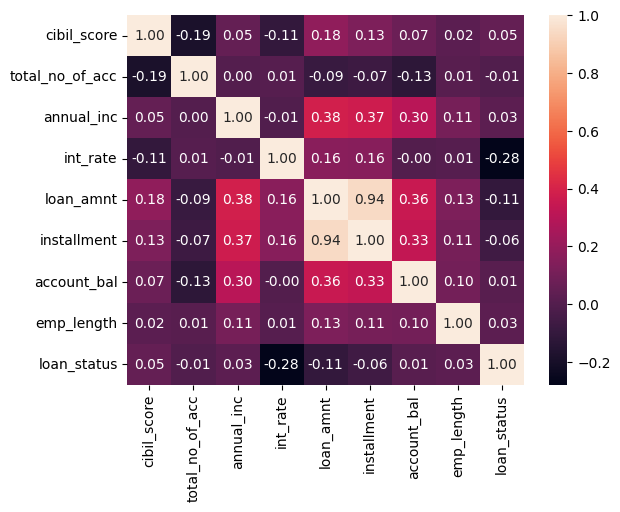

In [5]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")

In [6]:
categorical_vars = ["sub_grade", "term", "home_ownership", "purpose", "application_type", "verification_status"]

In [7]:
for col in categorical_vars:
    print(col)
    print(sorted(df[col].unique()))

sub_grade
['B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']
term
[' 36 months', ' 60 months']
home_ownership
['MORTGAGE', 'OWN', 'RENT']
purpose
['car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding']
application_type
['Individual', 'Joint App']
verification_status
['Not Verified', 'Source Verified', 'Verified']


## Univariate analysis

Loan status
- Data is highly skewed
- About 2.5x more data is available on attributes that lead to loan defaults than on on-time payments

Non-dfaults: 29689
Defaults: 84016


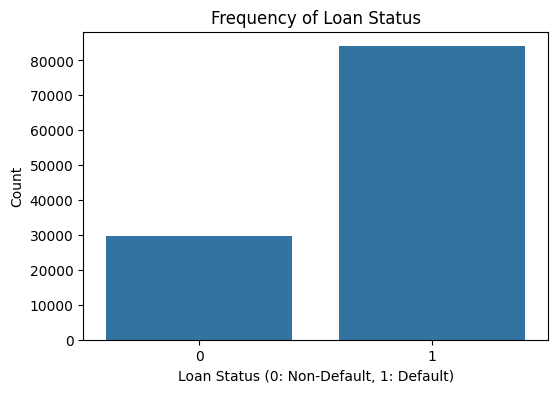

In [8]:
print("Non-dfaults:", df[df["loan_status"] == 0].shape[0])
print("Defaults:", df[df["loan_status"] == 1].shape[0])

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='loan_status')
plt.title('Frequency of Loan Status')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Count')
plt.show()

Cibil score
- A right-skewed distribution
- Majority of the people in the dataset have a very low cibil score

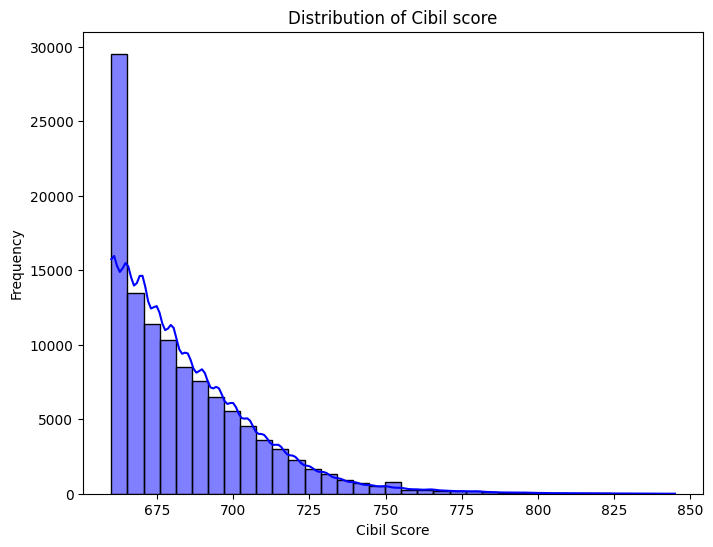

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df["cibil_score"], kde=True, color='blue', bins=35)
plt.title(f'Distribution of Cibil score')
plt.xlabel(f'Cibil Score')
plt.ylabel('Frequency')
plt.show()

Purpose
- Majority of loans are for debt consolidation and credit card
- 72.8% of the loans taken for debt consolidation were defaulted

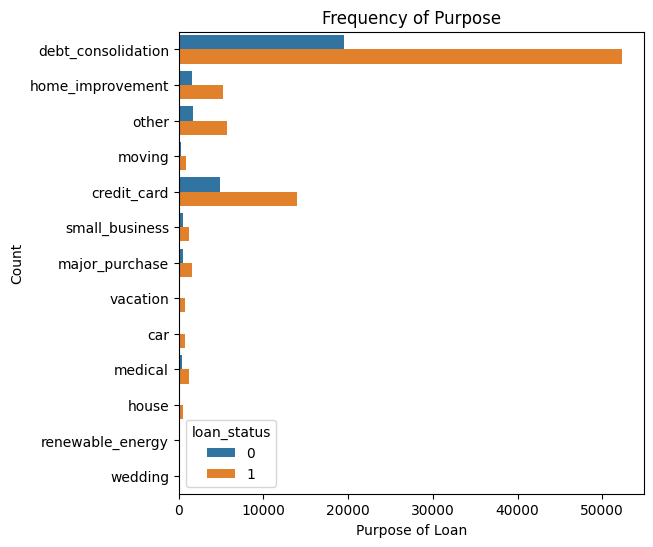

debt_consolidation: 72.86052668245785% defaults
credit_card: 74.20074349442379% defaults
home_improvement: 76.73707210487983% defaults
other: 77.85335328526732% defaults


In [26]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, y='purpose', hue='loan_status')
plt.title('Frequency of Purpose')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.show()

def calc_defaults(col):
    total = df[df.purpose == col].shape[0]
    defaults = df[df.purpose == col]["loan_status"].sum()
    print(f"{col}: {defaults / total * 100}% defaults")

calc_defaults("debt_consolidation")
calc_defaults("credit_card")
calc_defaults("home_improvement")
calc_defaults("other")